## <font color='#008000'>Required imports</font> 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

import pickle

2022-08-26 17:56:42.928303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 17:56:42.928322: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load the dataset 

X = img, y = label

In [2]:
(train_img, train_label), (test_img, test_label) = datasets.cifar10.load_data()

In [3]:
train_img.shape

(50000, 32, 32, 3)

In [4]:
test_img.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [5]:
train_label.shape

(50000, 1)

In [6]:
train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

train_label is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
train_label = train_label.reshape(-1)
train_label[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## Plotting some images to see what they are 

In [9]:
def plot_sample(img, label, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(img[index])
    plt.xlabel(classes[label[index]])

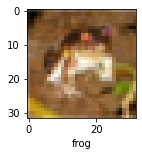

In [10]:
plot_sample(train_img, train_label, 0)

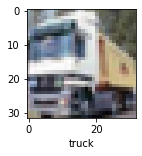

In [11]:
plot_sample(train_img, train_label, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalize the training data

In [12]:
train_img = train_img / 255
test_img = test_img /255

# Here we will perform classification with ANN and CNN, to see the difference in accuracy.

### Building Artificial Neural Network for image classification

In [13]:
# ann = models.Sequential([
#         layers.Flatten(input_shape=(32,32,3)),
#         layers.Dense(3000, activation='relu'),
#         layers.Dense(1000, activation='relu'),
#         layers.Dense(10, activation='softmax')    
# ])

## Compiling Artificial Neural Network

In [14]:
# ann.compile(optimizer = 'SGD',
#            loss = 'sparse_categorical_crossentropy',
#             metrics = ['accuracy'])

## Training Artificial Neural Network  

In [15]:
# ann.fit(train_img, train_label, epochs = 3)

You can see that at the end of 5 epochs, accuracy is at around %48

In [16]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np

# pred_label = ann.predict(test_img)
# pred_label_classes = [np.argmax(element) for element in pred_label]

# print("Classification Report: \n", classification_report(test_label, pred_label_classes))

### Building Convolutional neural network for image classification

In [17]:
cnn = models.Sequential([
    
    # This is the first convolutional layer with max pooling, we can use as many as possible according to need, also we can use average pooling   
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),    
    
    # This is the second convolutional layer with max pooling
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
        
    # This is the third convolutional layer with max pooling
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    # Here we don't need to make extra dense layer because we have used cnn above, it will optimize it automatically     
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    

])

2022-08-26 17:56:45.565977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-26 17:56:45.565999: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 17:56:45.566012: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-H410M-H-V3): /proc/driver/nvidia/version does not exist
2022-08-26 17:56:45.566266: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compiling Convolutional Neural Network 

In [18]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

## Training Convolutional Neural Network 

In [19]:
cnn.fit(train_img, train_label, epochs=750)

Epoch 1/750


2022-08-26 17:56:46.022440: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 17s 11ms/step - loss: 1.6252 - accuracy: 0.4032
Epoch 2/750
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3074 - accuracy: 0.5292
Epoch 3/750
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1761 - accuracy: 0.5834
Epoch 4/750
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0836 - accuracy: 0.6199
Epoch 5/750
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0144 - accuracy: 0.6432
Epoch 6/750
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9684 - accuracy: 0.6621
Epoch 7/750
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9208 - accuracy: 0.6774
Epoch 8/750
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8930 - accuracy: 0.6880
Epoch 9/750
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8553 - accuracy: 0.7001
Epoch 10/750
1563/1563 [==============================] - 17s 11ms/

1563/1563 [==============================] - 15s 9ms/step - loss: 0.3668 - accuracy: 0.8663
Epoch 79/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3634 - accuracy: 0.8660
Epoch 80/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3592 - accuracy: 0.8696
Epoch 81/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3613 - accuracy: 0.8674
Epoch 82/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3566 - accuracy: 0.8692
Epoch 83/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3575 - accuracy: 0.8700
Epoch 84/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3568 - accuracy: 0.8693
Epoch 85/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3521 - accuracy: 0.8714
Epoch 86/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3482 - accuracy: 0.8729
Epoch 87/750
1563/1563 [==============================] - 15s 9ms/st

1563/1563 [==============================] - 15s 9ms/step - loss: 0.2614 - accuracy: 0.9031
Epoch 156/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2662 - accuracy: 0.9004
Epoch 157/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2684 - accuracy: 0.9015
Epoch 158/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2659 - accuracy: 0.9024
Epoch 159/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2564 - accuracy: 0.9049
Epoch 160/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2603 - accuracy: 0.9035
Epoch 161/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2639 - accuracy: 0.9021
Epoch 162/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2546 - accuracy: 0.9062
Epoch 163/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2612 - accuracy: 0.9029
Epoch 164/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.2250 - accuracy: 0.9174
Epoch 233/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2190 - accuracy: 0.9200
Epoch 234/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2275 - accuracy: 0.9166
Epoch 235/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2231 - accuracy: 0.9187
Epoch 236/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2309 - accuracy: 0.9160
Epoch 237/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2236 - accuracy: 0.9181
Epoch 238/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2194 - accuracy: 0.9188
Epoch 239/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2301 - accuracy: 0.9150
Epoch 240/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2201 - accuracy: 0.9191
Epoch 241/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.2046 - accuracy: 0.9271
Epoch 310/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2146 - accuracy: 0.9225
Epoch 311/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2114 - accuracy: 0.9250
Epoch 312/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2035 - accuracy: 0.9260
Epoch 313/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2100 - accuracy: 0.9244
Epoch 314/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2119 - accuracy: 0.9225
Epoch 315/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2025 - accuracy: 0.9266
Epoch 316/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2099 - accuracy: 0.9246
Epoch 317/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2053 - accuracy: 0.9262
Epoch 318/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.1940 - accuracy: 0.9295
Epoch 387/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2002 - accuracy: 0.9288
Epoch 388/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2068 - accuracy: 0.9278
Epoch 389/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1893 - accuracy: 0.9313
Epoch 390/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1970 - accuracy: 0.9301
Epoch 391/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1929 - accuracy: 0.9299
Epoch 392/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1909 - accuracy: 0.9324
Epoch 393/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1978 - accuracy: 0.9294
Epoch 394/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2112 - accuracy: 0.9262
Epoch 395/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.2001 - accuracy: 0.9292
Epoch 464/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1875 - accuracy: 0.9346
Epoch 465/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1901 - accuracy: 0.9331
Epoch 466/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1992 - accuracy: 0.9315
Epoch 467/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2003 - accuracy: 0.9305
Epoch 468/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1905 - accuracy: 0.9333
Epoch 469/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1909 - accuracy: 0.9333
Epoch 470/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1967 - accuracy: 0.9319
Epoch 471/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1882 - accuracy: 0.9348
Epoch 472/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.1891 - accuracy: 0.9356
Epoch 541/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1873 - accuracy: 0.9347
Epoch 542/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1968 - accuracy: 0.9343
Epoch 543/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1846 - accuracy: 0.9377
Epoch 544/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1888 - accuracy: 0.9350
Epoch 545/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1914 - accuracy: 0.9344
Epoch 546/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1917 - accuracy: 0.9341
Epoch 547/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1817 - accuracy: 0.9371
Epoch 548/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1888 - accuracy: 0.9355
Epoch 549/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.1792 - accuracy: 0.9390
Epoch 618/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1910 - accuracy: 0.9358
Epoch 619/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1829 - accuracy: 0.9382
Epoch 620/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1799 - accuracy: 0.9386
Epoch 621/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1918 - accuracy: 0.9359
Epoch 622/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1897 - accuracy: 0.9366
Epoch 623/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1815 - accuracy: 0.9378
Epoch 624/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1824 - accuracy: 0.9389
Epoch 625/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1805 - accuracy: 0.9386
Epoch 626/750
1563/1563 [==============================] - 1

1563/1563 [==============================] - 15s 9ms/step - loss: 0.1833 - accuracy: 0.9392
Epoch 695/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1844 - accuracy: 0.9396
Epoch 696/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1929 - accuracy: 0.9369
Epoch 697/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1855 - accuracy: 0.9388
Epoch 698/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1752 - accuracy: 0.9406
Epoch 699/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1861 - accuracy: 0.9375
Epoch 700/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1786 - accuracy: 0.9399
Epoch 701/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1840 - accuracy: 0.9376
Epoch 702/750
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1782 - accuracy: 0.9407
Epoch 703/750
1563/1563 [==============================] - 1

#### With CNN, at the end 5 epochs, accuracy was at around 75% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

## Saving trained model

In [20]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(cnn, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://5b0a0d3a-10d5-4016-9698-c70225e1231d/assets


INFO:tensorflow:Assets written to: ram://5b0a0d3a-10d5-4016-9698-c70225e1231d/assets


## load the saved model

In [21]:
loaded_model = pickle.load(open(filename, 'rb'))

## Predicting test_img

In [22]:
pred_label = cnn.predict(test_img)
pred_label[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.17720415e-11, 7.45865788e-15, 1.63468489e-04, 9.06347454e-01,
        1.38096565e-12, 7.20307753e-07, 9.34882164e-02, 4.46573507e-12,
        6.48870184e-08, 2.42599506e-13],
       [6.02750379e-23, 9.99999940e-01, 9.49080953e-38, 1.27364712e-33,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.89735405e-10, 7.75297231e-23],
       [6.14401142e-06, 9.84992312e-06, 1.93829605e-10, 3.23699197e-07,
        7.87135062e-18, 1.55160183e-15, 2.20702037e-12, 8.20557408e-14,
        9.99983490e-01, 6.25330046e-08],
       [8.63152381e-05, 4.29050240e-10, 1.16300944e-13, 4.47960126e-19,
        6.11184085e-22, 2.24544586e-30, 6.91119418e-20, 0.00000000e+00,
        9.99913633e-01, 3.11862931e-11],
       [2.12263313e-18, 1.23180668e-13, 3.76778735e-05, 1.14632414e-04,
        9.97002423e-01, 7.34859071e-08, 2.84520537e-03, 4.56571198e-10,
        1.48422019e-12, 3.45929611e-13]], dtype=float32)

In [23]:
classes_label = [np.argmax(element) for element in pred_label]
classes_label[:5]

[3, 1, 8, 8, 4]

## Calculating Accuracy

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, classes_label)

0.6436

## Evaluating CNN model

In [25]:
cnn.evaluate(test_img, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 4.3668 - accuracy: 0.6436


[4.3667802810668945, 0.6435999870300293]

In [26]:
test_label[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
test_label = test_label.reshape(-1)
test_label[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

## Taking predictions randomly

Prediction is: bird 
 Accuracy is 64.36


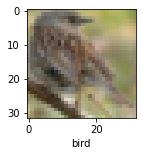

In [28]:
ind = random.randint(0, 10000)
plot_sample(test_img, test_label, ind)
print(f"Prediction is: {classes[classes_label[ind]]} \n Accuracy is {accuracy_score(test_label, classes_label)*100}")

## Taking predictions in outside image

In [29]:
import cv2

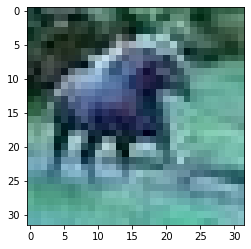

In [30]:
path = '/home/user/Documents/Image Processing/Artificial Neural Network/CIFAR10/Data/horse03.jpg'
new_img = cv2.imread(path)
plt.imshow(new_img)

## Reshaping image

In [31]:
new_img = new_img.reshape(-1, 32, 32, 3)

## Prediction and verifying image

In [32]:
pred_label = cnn.predict(new_img)

1/1 [==============================] - 0s 47ms/step


In [33]:
classes_label = np.argmax(pred_label)
print(classes_label)

1


In [34]:
classes[classes_label]

'automobile'